In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import ticker

sns.set(style='white',  font='sans-serif', font_scale=2)


In [91]:
dataset_name = 'plk1'

In [92]:
dfo = pd.read_pickle('./results/%s/%s.pkl' % (dataset_name, dataset_name))

In [93]:
dfo

,Epoch,train_loss,train_triplet_loss,train_mae_loss,train_n_triplets,train_pos_triplets,val_loss,val_triplet_loss,val_mae_loss,val_n_triplets,val_pos_triplets,val_rmse,fold,repeat,cliff,alpha,dataset
0,0,7.299631,0.0,7.299631,0,0,7.212008,0.0,7.212008,0,0,7.271851,fold_1,repeat_1,"(0.0, 0.0)",1,plk1
1,1,7.287706,0.0,7.287706,0,0,7.202816,0.0,7.202816,0,0,7.262747,fold_1,repeat_1,"(0.0, 0.0)",1,plk1
2,2,7.278403,0.0,7.278403,0,0,7.191591,0.0,7.191591,0,0,7.251617,fold_1,repeat_1,"(0.0, 0.0)",1,plk1
3,3,7.267188,0.0,7.267188,0,0,7.180999,0.0,7.180999,0,0,7.241110,fold_1,repeat_1,"(0.0, 0.0)",1,plk1
4,4,7.256556,0.0,7.256556,0,0,7.168191,0.0,7.168191,0,0,7.228421,fold_1,repeat_1,"(0.0, 0.0)",1,plk1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.296232,0.0,0.296232,0,0,0.400584,0.0,0.400584,0,0,0.592191,fold_5,repeat_1,"(3.5, 3.5)",1,plk1
996,996,0.297468,0.0,0.297468,0,0,0.407450,0.0,0.407450,0,0,0.572432,fold_5,repeat_1,"(3.5, 3.5)",1,plk1
997,997,0.298618,0.0,0.298618,0,0,0.399652,0.0,0.399652,0,0,0.585579,fold_5,repeat_1,"(3.5, 3.5)",1,plk1
998,998,0.295603,0.0,0.295603,0,0,0.399747,0.0,0.399747,0,0,0.584595,fold_5,repeat_1,"(3.5, 3.5)",1,plk1


In [94]:
df1s = []
df2s  = []
for i in [1]:
    df = dfo[dfo.repeat == 'repeat_%s' % i]
    
    df1 = df.groupby(['cliff', 'fold']).train_n_triplets.max().reset_index()
    df1 = df1.groupby('cliff').train_n_triplets.mean().to_frame().reset_index() 
    df1[['cliff_lower', 'cliff_upper']] = df1.cliff.apply(pd.Series)
    
    dfx = df.groupby(['cliff', 'fold']).val_rmse.rolling(1).mean().reset_index()
    
    df2 = dfx.groupby(['cliff', 'fold']).val_rmse.min().reset_index()
    df2 = df2.groupby('cliff').val_rmse.mean().to_frame().reset_index() 
    df2[['cliff_lower', 'cliff_upper']] = df2.cliff.apply(pd.Series)

    
    df1s.append(df1)
    df2s.append(df2)

In [95]:
df1 = pd.concat(df1s).groupby('cliff').mean()
df2 = pd.concat(df2s).groupby('cliff').mean()

6 15


/tmp/ipykernel_635283/3583593497.py:96: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels)


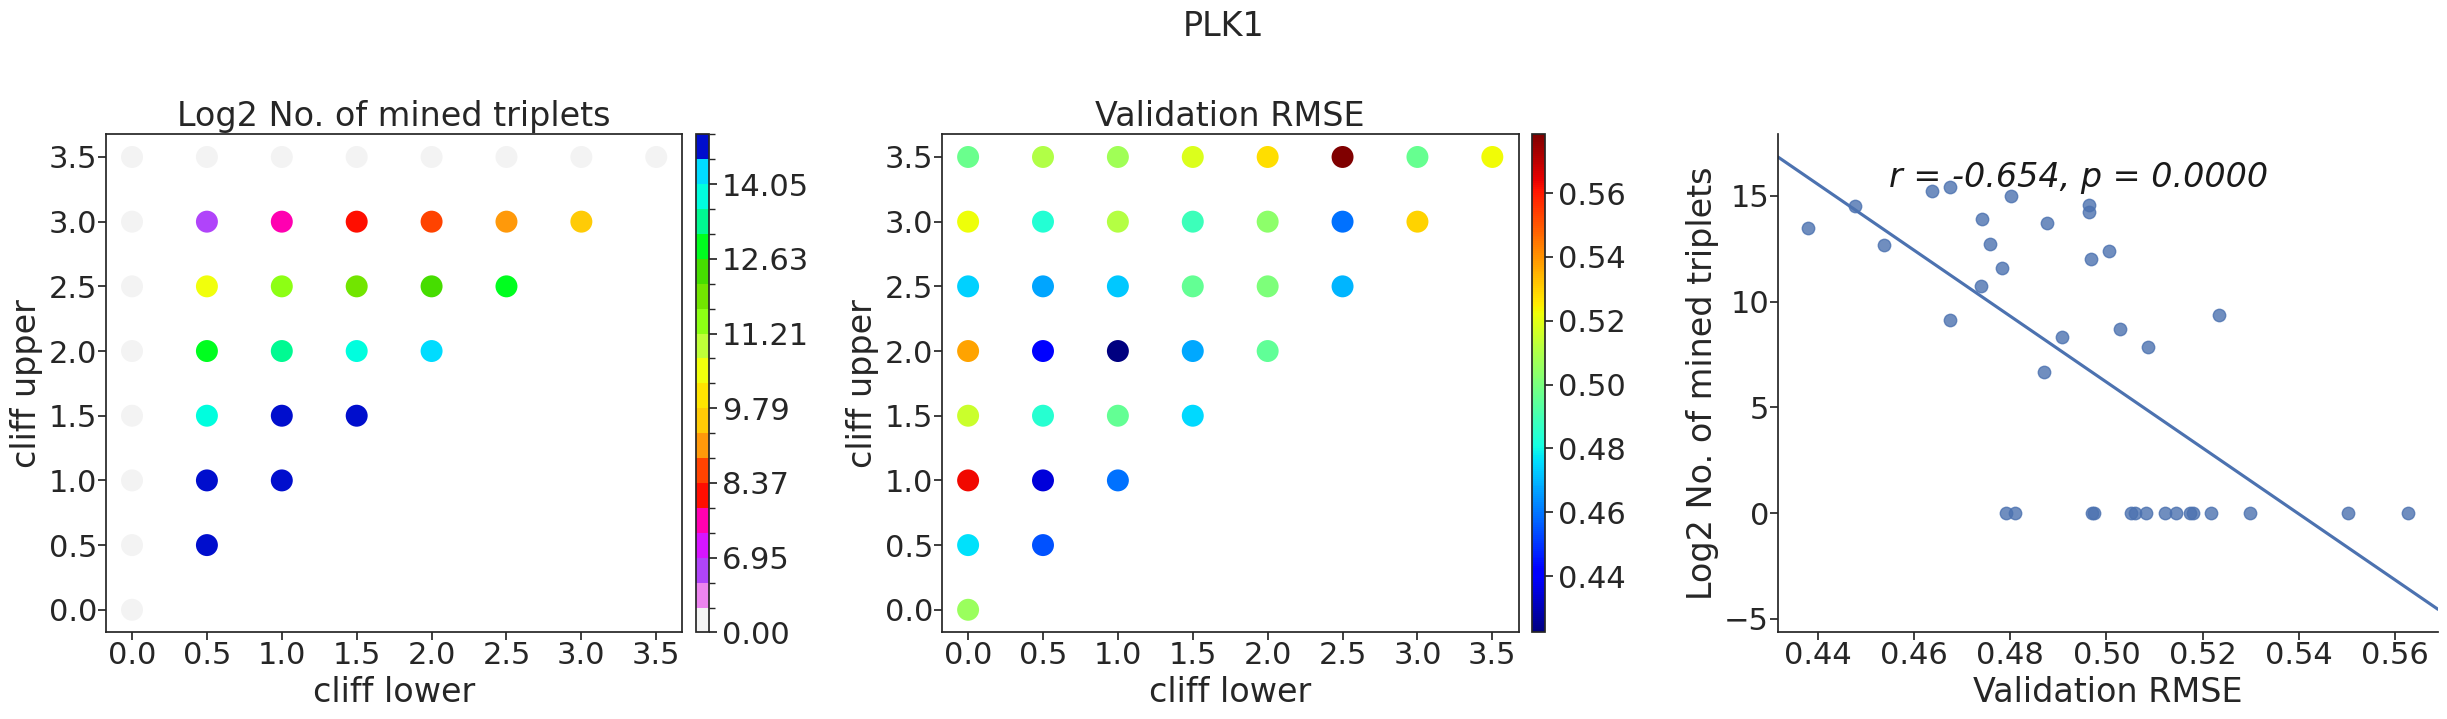

In [101]:
ticks =  list(np.arange(0.0, 4, 0.5).round(2)) #[0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3., 3.5, 4]

dfp1 = df1
dfp1['trps'] = dfp1.train_n_triplets.astype(int)

dfp1['trps2'] = dfp1.trps.replace(0, np.nan)

dfp1['trps2'] = np.log2(dfp1['trps2'])

v = dfp1.trps2.dropna().sort_values().astype(int)
bds = [0]
bds1 = np.linspace(v.min(), v.max(), 20)
print(v.min(), v.max())

#bds1 = np.logspace(np.log2(v.min()),  np.log2(v.max()), num = 100, base = 2)

bds.extend(bds1)

bds = pd.Series(bds).astype(float).to_list()

base_cmaps = ['Greys', 'gist_ncar_r'] #gist_ncar_r 

n_base = len(base_cmaps)
N=[1, len(bds1)]# number of colors  to extract from each cmap, sum(N)=len(classes)
colors = np.concatenate([plt.get_cmap(name)(np.linspace(0.1, 0.9, N[i])) for i,name in zip(range(n_base),base_cmaps)])
cmap = ListedColormap(colors)

boundary_norm = BoundaryNorm(bds, cmap.N)


fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(25, 7.5), gridspec_kw = {'width_ratios':[1,1,0.95]})

s = 250
marker = 'o'
lw = 0

im = ax1.scatter(x = dfp1.cliff_lower, 
                 y = dfp1.cliff_upper, #vmax = dfp1.trps.max(), 
                 c = np.log2(dfp1.trps+1), 
                 norm = boundary_norm, #marker = ',',
                 marker = marker,
                 edgecolors='k', 
                 lw=lw, 
                 s = s, cmap= cmap, label = 'trps2')

# fmt = ticker.ScalarFormatter(useMathText=True)
# fmt.set_powerlimits((0,0))

cbar1 = fig.colorbar(im, ax=ax1, aspect=40, pad = 0.02,)

ax1.tick_params(left='off',  bottom='off', pad=.3,)

im = ax2.scatter(x = df2.cliff_lower, 
                 y = df2.cliff_upper, 
                 marker = marker,
                 c = df2.val_rmse, 
                 s = s, cmap= 'jet', 
                 edgecolors='k', lw=lw,  
                 #vmax = 0.48,
                 label = 'val_rmse')

cbar2 = fig.colorbar(im, ax=ax2, aspect=40, pad = 0.02)
fig.tight_layout()


for ax, title in zip([ax1, ax2], ['Log2 No. of mined triplets', 'Validation RMSE']): 
    ax.set_ylabel('cliff upper')
    ax.set_xlabel('cliff lower')
    ax.tick_params(left='off',  bottom='off', pad=.3,)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_title(title)

x = df2.val_rmse
y = np.log2(df1.train_n_triplets + 1)
data = x.to_frame().join(y)

sns.regplot(data = data, x = x.name, y = y.name, ax = ax3, ci=0, truncate= False, color = 'b', 
            scatter_kws={'s':80, 'color':'b'})

r, p = stats.pearsonr(x, y)


ax3.text(x.mean()-0.05, y.max(), 
         'r = %.3f, p = %.4f' % (r, p), 
         fontstyle='italic', color = 'k')

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax3.tick_params(left='off',  bottom='off', pad=.5,)
ax3.set_ylabel('Log2 No. of mined triplets')
ax3.set_xlabel('Validation RMSE')

labels = [item.get_text() for item in cbar2.ax.yaxis.get_ticklabels()]
ax3.set_xticklabels(labels)

st = fig.suptitle(dataset_name.upper(), fontsize="medium")

fig.tight_layout()

#fig.savefig('../results/cliff_performance_%s.png' % dataset_name, dpi = 300, bbox_inches='tight')
#fig.savefig('../results/cliff_performance_%s.pdf' % dataset_name, dpi = 300, bbox_inches='tight')

In [100]:
df2.loc[[df2.val_rmse.idxmin()]]

,val_rmse,cliff_lower,cliff_upper
cliff,,,
"(1.0, 2.0)",0.422371,1.0,2.0


In [98]:
df1.loc[[df1.train_n_triplets.idxmax()]]

,train_n_triplets,cliff_lower,cliff_upper,trps,trps2
cliff,,,,,
"(1.0, 1.0)",43321.2,1.0,1.0,43321,15.402779
